In [105]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
sns.set(context="notebook",palette="Spectral",style='darkgrid',color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics,model_selection
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_confusion_matrix

In [2]:
data=pd.read_csv('C:\\Users\\Divya\\OneDrive\\Desktop\\Predictive Modelling Project\\Holiday_Package.csv')

In [3]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
data.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
data.shape

(872, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [7]:
data.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are 872 rows and 8 columns in the dataset.

* Out of 8 columns, 2 variables are of object datatype and remaining 6 variables are of int64 datatype.

* There are 2 unique values in target variable 'Holliday_Package' with 'no' being the top one with frequency of 471 out of 872. It means most of the employees didnot opt for Holiday package.

* There are 2 unique values in variable 'foreign' with 'no' being the top with frequency of 656 out of 872. It means majority of employees are not foreigners.

* The average salary of employees is around $47729.2.

* The average age of employees is 39 with minimum age as 20 and maximum as 62.

* The average number of years of formal education is 9 with minimum as 1 and maximum as 21.

* It appears there are outliers in few variables.


In [12]:
# Copying the dataset

data_copy= data.copy()

In [13]:
# drop the serial no column 

data = data.drop('Unnamed: 0', axis=1)

The variable 'Unnamed:0' has no significance or impact on target variable 'Holiday_Package'. Hence dropped the column 'Unnamed:0'.

In [14]:
data.rename(columns={'Holliday_Package':'Holiday_Package','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children','foreign':'Foreign'},inplace=True)

In [15]:
data.columns

Index(['Holiday_Package', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [104]:
data.Holiday_Package.value_counts(1)

0    0.540138
1    0.459862
Name: Holiday_Package, dtype: float64

In [16]:
pd.crosstab(data['No_young_children'],data['Holiday_Package'],margins=True)

Holiday_Package,no,yes,All
No_young_children,,,
0,326,339,665
1,100,47,147
2,42,13,55
3,3,2,5
All,471,401,872


We can see that around 24% of employees have one or more young child. Out of these employees, 70% ((100+42+3)/(147+55+5)) are not opting for tours. Out of 872 employees, 665 employees do not have children. Only 50% of the employees without young children opted for tours.

In [17]:
pd.crosstab(data['No_older_children'],data['Holiday_Package'],margins=True)

Holiday_Package,no,yes,All
No_older_children,,,
0,231,162,393
1,102,96,198
2,102,106,208
3,27,28,55
4,7,7,14
5,2,0,2
6,0,2,2
All,471,401,872


From the above table, it appears that, out of 872, 393 employees do not have any older children. Out of 393 employees who do not have older children, 41% have opted for holiday package. Also from the above table, we can notice that, as the number of older children increase, the probability of employee opting for tour increases.

In [18]:
pd.crosstab(data['Foreign'],data['Holiday_Package'],margins=True)

Holiday_Package,no,yes,All
Foreign,,,
no,402,254,656
yes,69,147,216
All,471,401,872


Out of all the employees, 24% of employees are foreigners. Out of these, 68% of employees are opting for holiday packages. Hence from the above table, we can infer that Foreigner employees are more likely to opt for tour.

# EDA:

# Data Skewness:

In [19]:
data.skew().sort_values(ascending=True)

Educ                -0.045501
Age                  0.146412
No_older_children    0.953951
No_young_children    1.946515
Salary               3.103216
dtype: float64

# Univariate Analysis:

# Age:

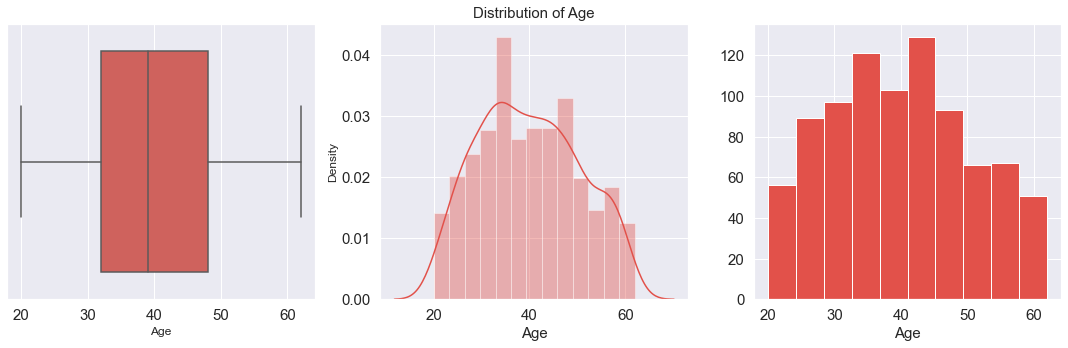

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Age',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_title('Distribution of Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Age' is positively skewed at 0.146412. There are no outliers in the variable. The distribution of age ranges from 20 to 62.

# Salary:

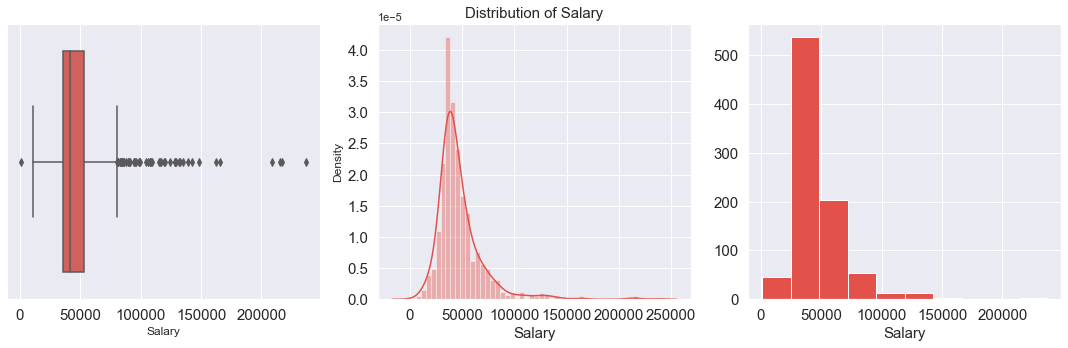

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Salary',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Salary'],ax=ax2)
ax2.set_xlabel('Salary', fontsize=15)
ax2.set_title('Distribution of Salary', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Salary'])
ax3.set_xlabel('Salary', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Salary' is positively skewed at 3.103216. There are outliers in the variable. The distribution of Salary ranges from 1322 to 236961.

# Education:

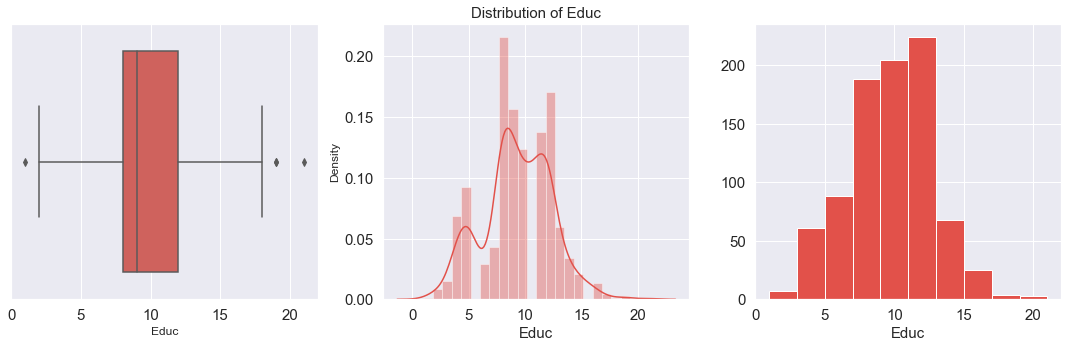

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Educ',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Educ'],ax=ax2)
ax2.set_xlabel('Educ', fontsize=15)
ax2.set_title('Distribution of Educ', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Educ'])
ax3.set_xlabel('Educ', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Educ' is negatively skewed at -0.045501. There are outliers in the variable. The distribution of Educ ranges from 1 to 21.

# No_young_children:

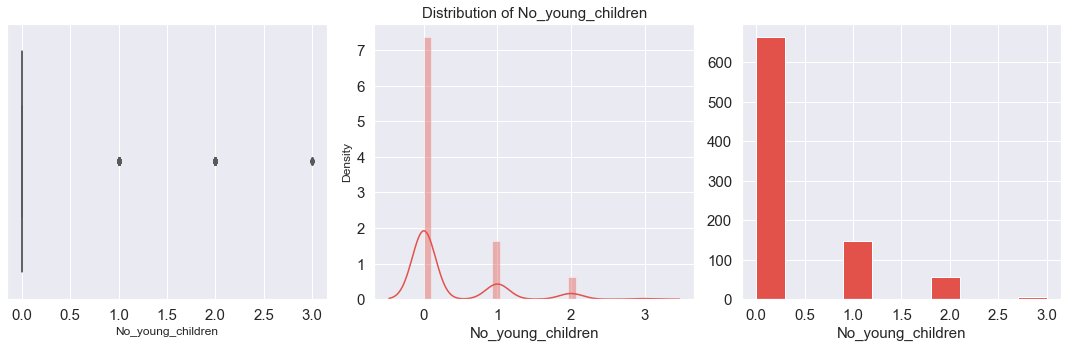

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='No_young_children',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['No_young_children'],ax=ax2)
ax2.set_xlabel('No_young_children', fontsize=15)
ax2.set_title('Distribution of No_young_children', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['No_young_children'])
ax3.set_xlabel('No_young_children', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'No_young_children' is positively skewed at 1.946515. There are outliers in the variable. The distribution of No_young_children ranges from 0 to 3.

# No_older_children:

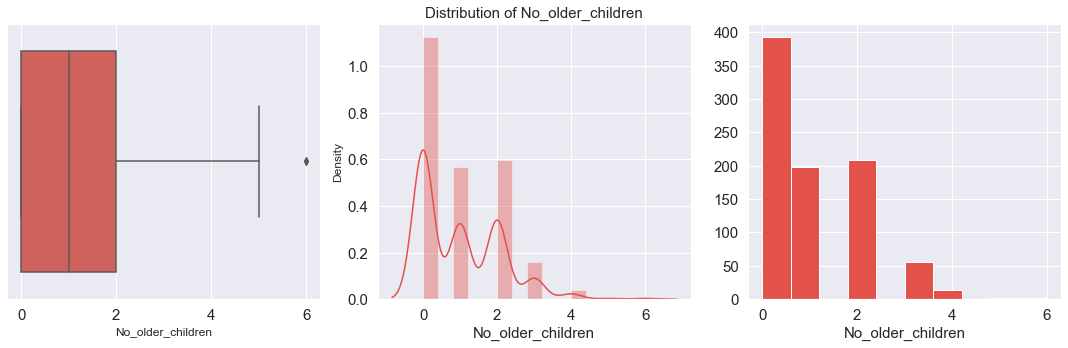

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='No_older_children',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['No_older_children'],ax=ax2)
ax2.set_xlabel('No_older_children', fontsize=15)
ax2.set_title('Distribution of No_older_children', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['No_older_children'])
ax3.set_xlabel('No_older_children', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'No_older_children' is positively skewed at 0.953951. There are very few outliers in the variable. The distribution of No_older_children ranges from 0 to 6.

# Categorical variables:

# Holiday_Package:

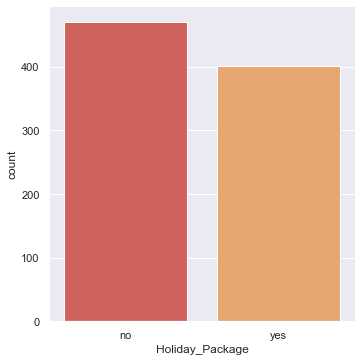

In [26]:
sns.catplot('Holiday_Package', data=data, kind='count')

# Foreign:

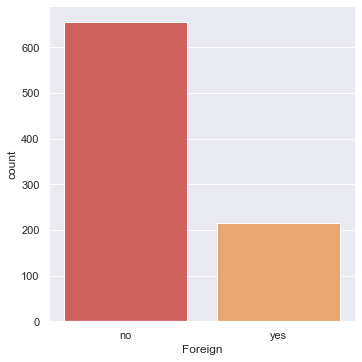

In [25]:
sns.catplot('Foreign', data=data, kind='count')

# Bivariate Analysis:

<AxesSubplot:xlabel='Holiday_Package', ylabel='Age'>

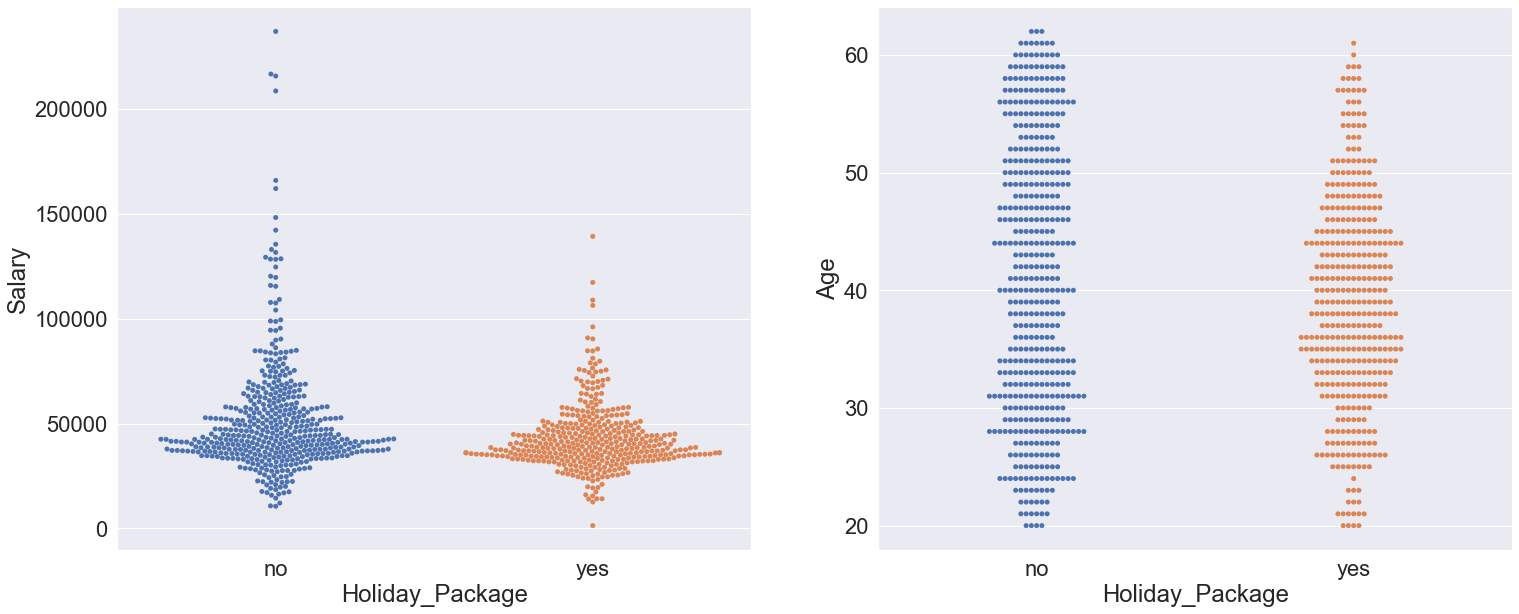

In [27]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=data,x='Holiday_Package', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=data,x='Holiday_Package', y='Age')

From the above swarm plots, we can notice that, as Salary increases to the max value, employees not opting for the holiday packages increase. As Age increases beyond 50, less number of employees opt for the holiday package.

<AxesSubplot:xlabel='Foreign', ylabel='count'>

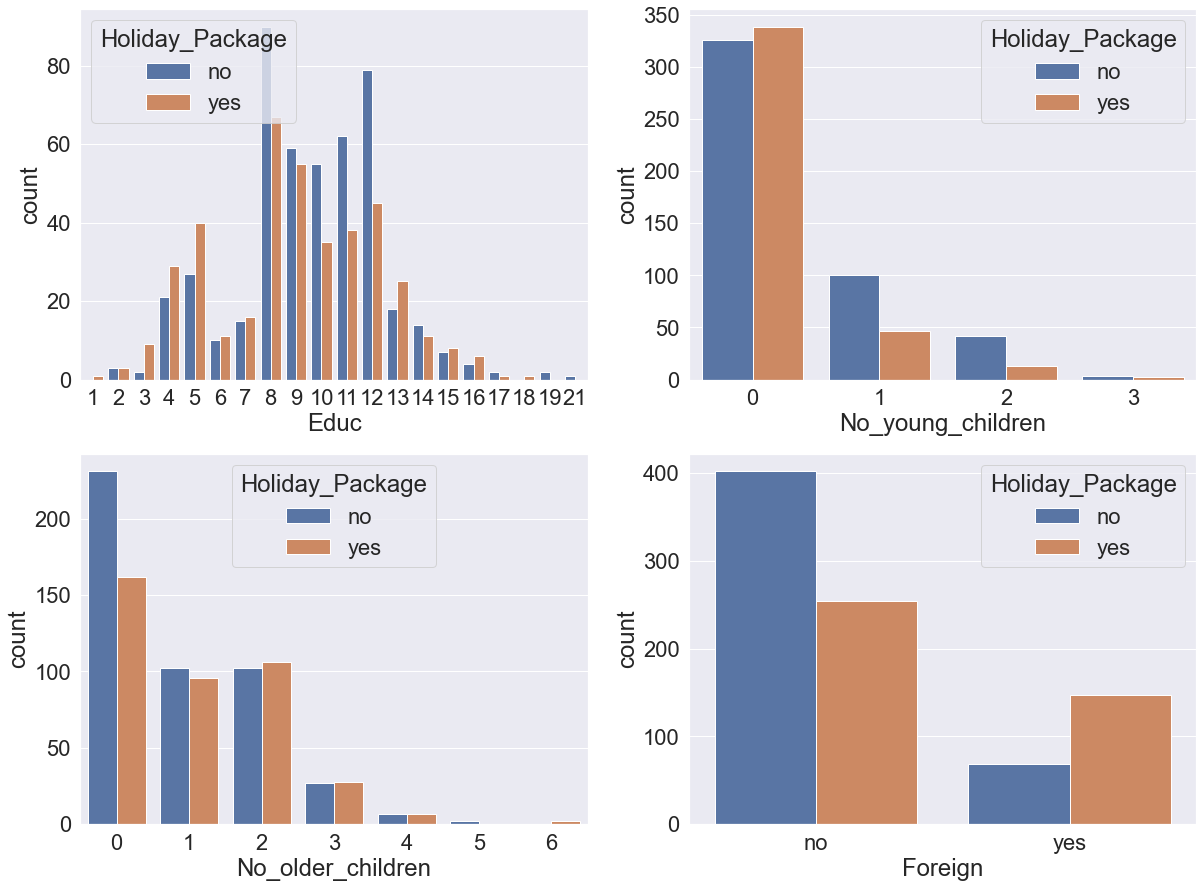

In [28]:
### Count plot

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=data,hue='Holiday_Package', x='Educ')
plt.subplot(2,2,2)
sns.countplot(data=data,hue='Holiday_Package', x='No_young_children')
plt.subplot(2,2,3)
sns.countplot(data=data,hue='Holiday_Package', x='No_older_children')
plt.subplot(2,2,4)
sns.countplot(data=data,hue='Holiday_Package', x='Foreign')

Inferences from above plots:

* From the Education plot, it appears employees with less number of education years are more likely to opt for holiday package.

* Employees with zero number of young children opt for holiday package. It is noticed that very less number of employess with young children opt for holiday package. 

* Number of older children doesnt appear to have much impact on whether or not employees will opt for holiday package.

* It appears employees who are foreigners are more likely to opt holiday packages.

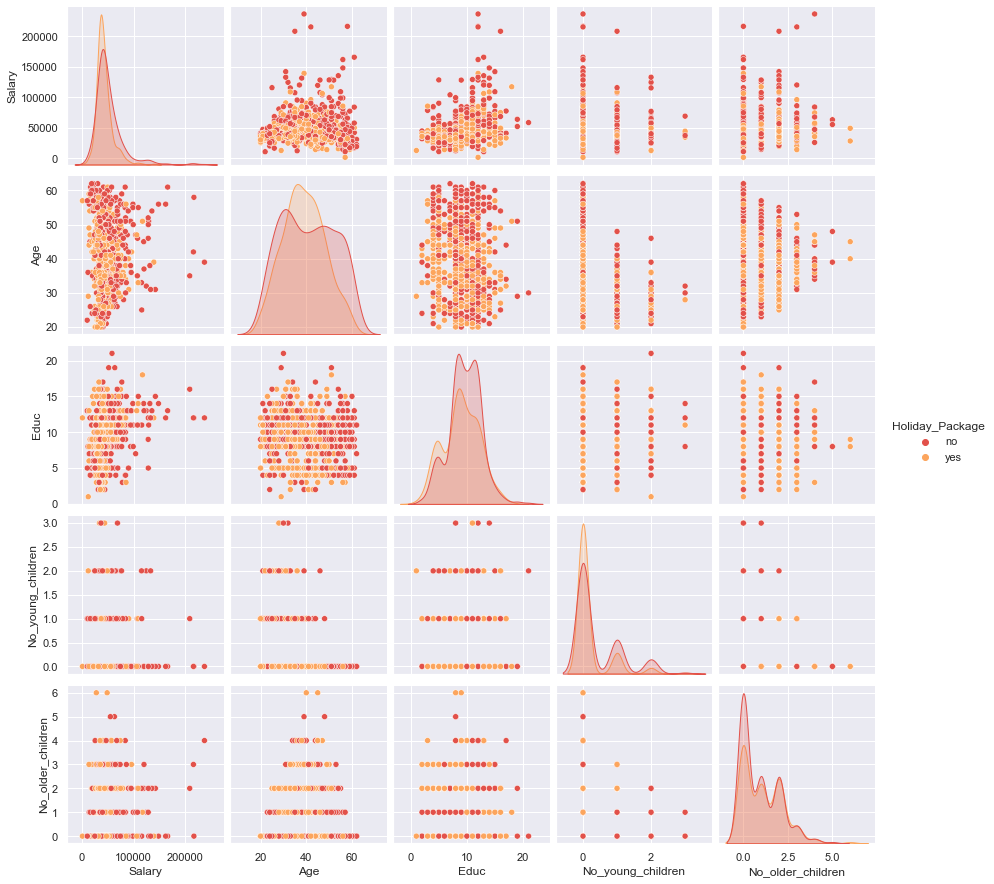

In [32]:
sns.pairplot(data , hue='Holiday_Package' , diag_kind = 'kde')

# Multivariate Analysis:

In [33]:
corr = data.corr()
round(corr,2)

,Salary,Age,Educ,No_young_children,No_older_children
Salary,1.00,0.07,0.33,-0.03,0.11
Age,0.07,1.00,-0.15,-0.52,-0.12
Educ,0.33,-0.15,1.00,0.10,-0.04
No_young_children,-0.03,-0.52,0.10,1.00,-0.24
No_older_children,0.11,-0.12,-0.04,-0.24,1.00


<AxesSubplot:>

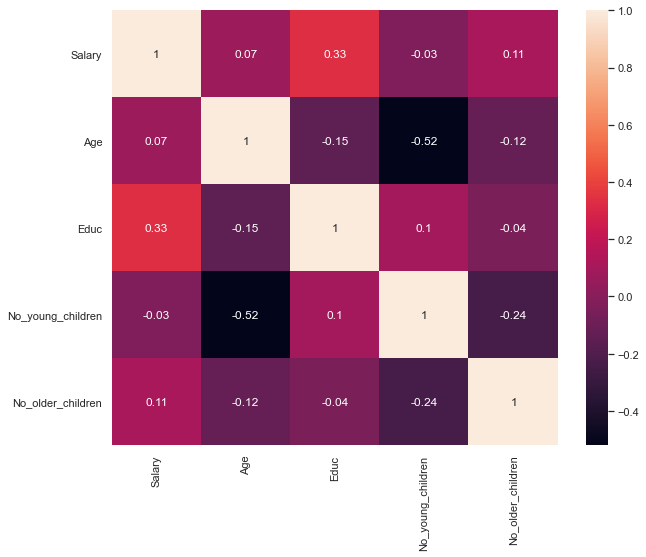

In [34]:
fig_dims = (10, 8)
fig = plt.subplots(figsize=fig_dims)
sns.heatmap(round(corr,2), annot=True)

* From the pair plot and heat map, it is observed that, Salary has some correlation with Education.

* Age is negatively correlated with No_young_children.

* The amount of collinearity among the variables is very negligible.

# Checking for Multicollinearity:

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [23]:
X = data[['Salary','Age','Educ','No_young_children','No_older_children']]
checkvif(X)

           Variables       VIF
0             Salary  6.027872
1                Age  6.832751
2               Educ  8.890845
3  No_young_children  1.403995
4  No_older_children  1.817912


VIF is greater than 5 for variables like Salary, Age and Education. However its value is less than 10. So dataset has some multicollinearity.

# Checking for outliers:

In [24]:
data_num=data[['Salary','Age','Educ','No_young_children','No_older_children']]

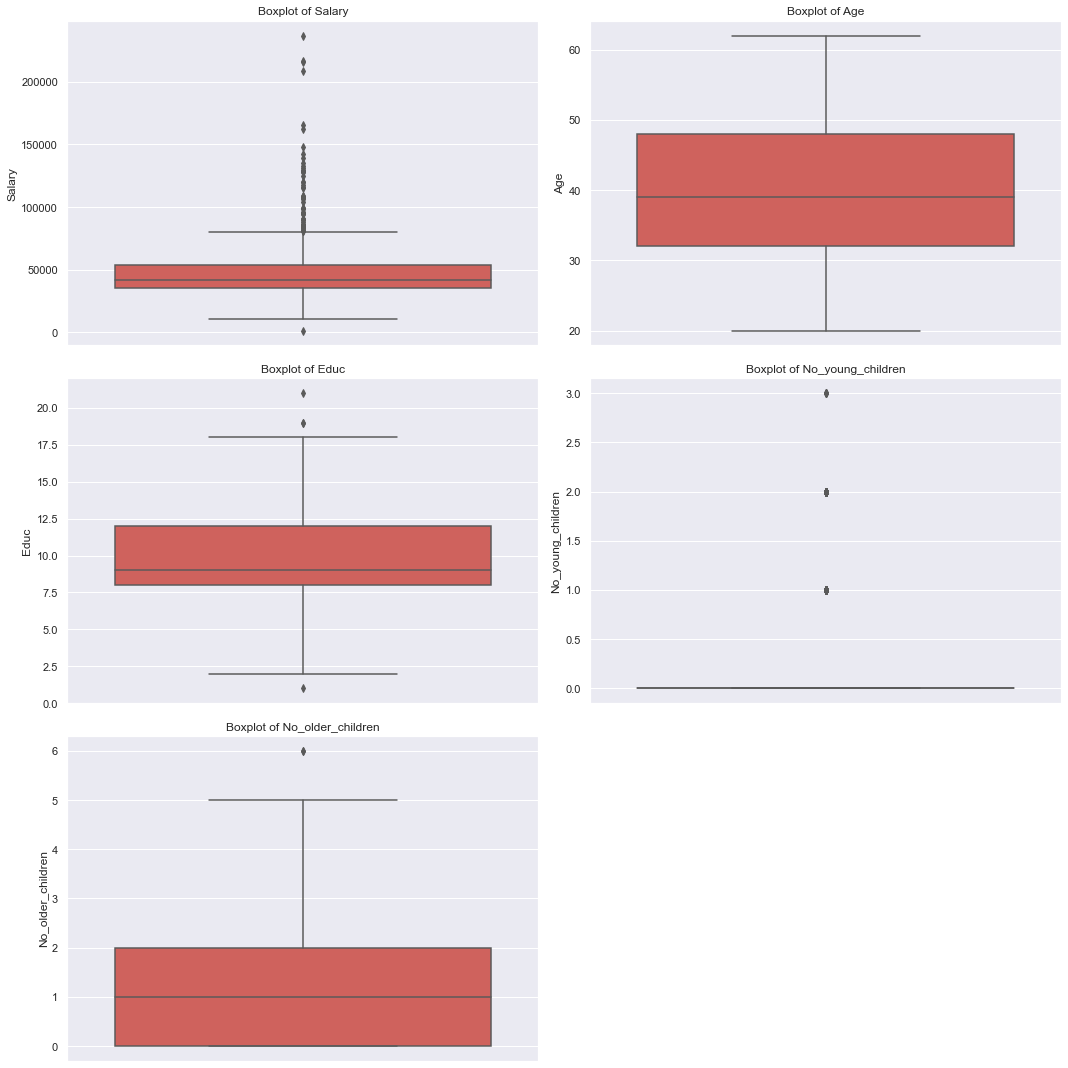

In [25]:
plt.figure(figsize = (15,15))
feature_list = data_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y = data_num[feature_list[i]], data = data_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

* There are no outliers in variable 'Age'.

* There are very few outliers in 'No_older_children', 'No_young_children' and 'Educ'. There is a possibility that they are genuine numbers. Hence not removing outliers in these variables.

* There are so many outliers in variable 'Salary'. 

* Since Logistic regression and LDA are sensitive to outliers. We proceed to remove outliers in variable 'Salary'.

# Removing Outliers:

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
for column in data_num.Salary:
    lr,ur=remove_outlier(data_num['Salary'])
    data_num['Salary']=np.where(data_num['Salary']>ur,ur,data_num['Salary'])
    data_num['Salary']=np.where(data_num['Salary']<lr,lr,data_num['Salary'])

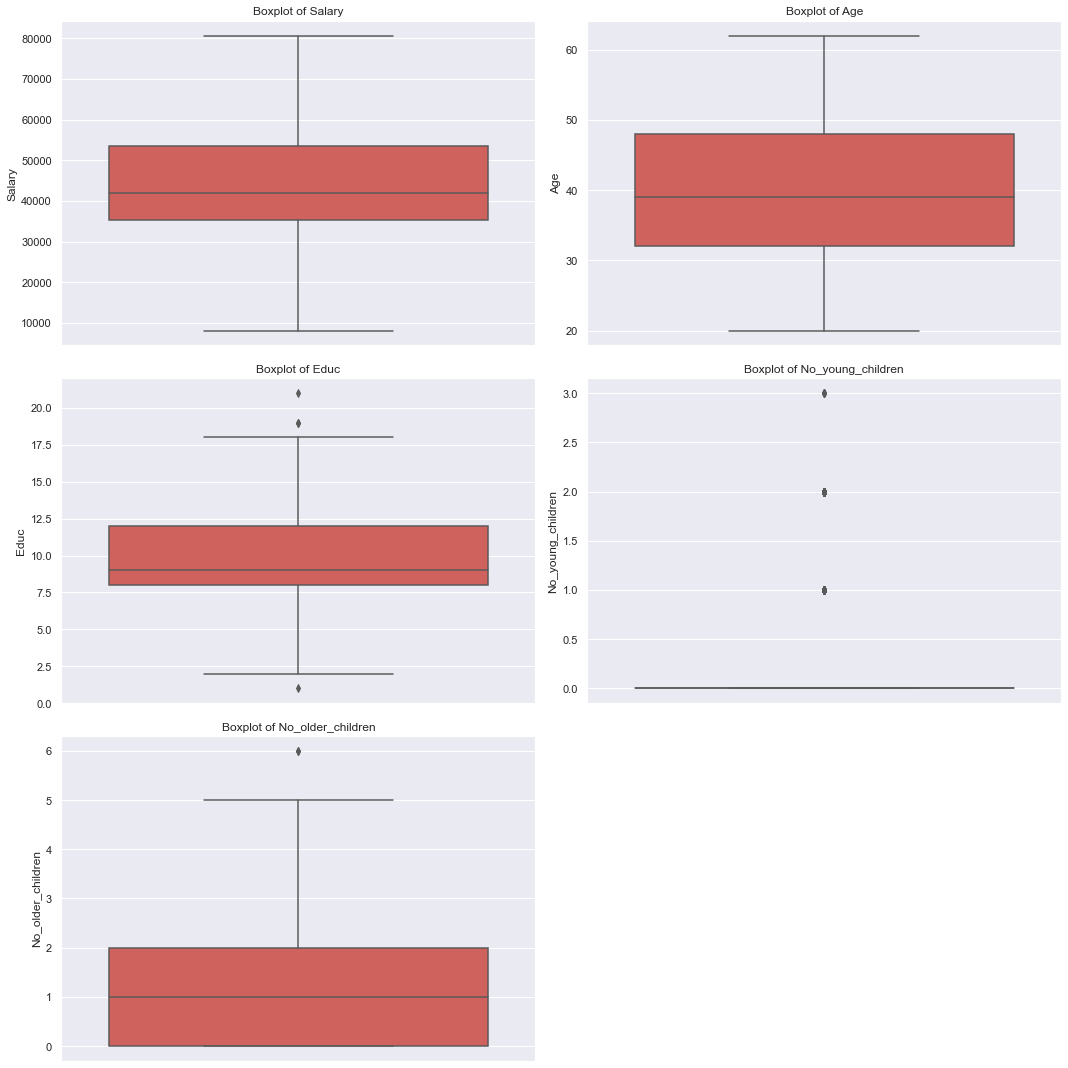

In [28]:
plt.figure(figsize = (15,15))
feature_list = data_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y = data_num[feature_list[i]], data = data_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Removed outliers only in variable 'Salary'.

# Data Encoding:

In [29]:
data=pd.get_dummies(data, columns=['Holiday_Package','Foreign'],drop_first=True)

In [30]:
data.head()

,Salary,Age,Educ,No_young_children,No_older_children,Holiday_Package_yes,Foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [31]:
data.tail()

,Salary,Age,Educ,No_young_children,No_older_children,Holiday_Package_yes,Foreign_yes
867,40030,24,4,2,1,0,1
868,32137,48,8,0,0,1,1
869,25178,24,6,2,0,0,1
870,55958,41,10,0,1,1,1
871,74659,51,10,0,0,0,1


In [32]:
data.dtypes

Salary                 int64
Age                    int64
Educ                   int64
No_young_children      int64
No_older_children      int64
Holiday_Package_yes    uint8
Foreign_yes            uint8
dtype: object

In [33]:
data.rename(columns={'Holiday_Package_yes':'Holiday_Package','Foreign_yes':'Foreign'},inplace=True)

In [34]:
data.columns

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children',
       'Holiday_Package', 'Foreign'],
      dtype='object')

In [35]:
data_lda=data.copy()

# Train-Test Split:

In [37]:
# Copy all the predictor variables into X dataframe

X = data.drop('Holiday_Package', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = data[['Holiday_Package']]

X.head()

,Salary,Age,Educ,No_young_children,No_older_children,Foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [38]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [39]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (data.shape)

(610, 6)
(262, 6)
(610, 1)
(262, 1)
(872, 7)


In [40]:
y_train.value_counts(normalize=True)

Holiday_Package
0                  0.539344
1                  0.460656
dtype: float64

In [41]:
y_test.value_counts(normalize=True)

Holiday_Package
0                  0.541985
1                  0.458015
dtype: float64

# Logistic Regression

In [42]:
# Fit the Logistic Regression model

model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

# Predicting on Training and Test dataset

In [43]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# Getting the Predicted Classes and Probs

In [44]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


# Model Evaluation

In [45]:
# Accuracy - Training Data

LR_acc_train=model.score(X_train, y_train)
LR_acc_train

0.6672131147540984

In [46]:
# Accuracy - Testing Data

LR_acc_test=model.score(X_test, y_test)
LR_acc_test

0.6526717557251909

# AUC and ROC for the training data & test data

AUC: 0.735


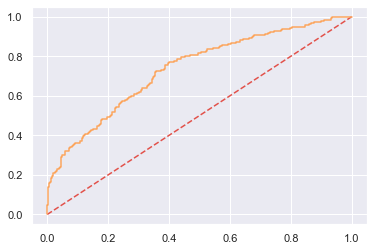

In [49]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.735


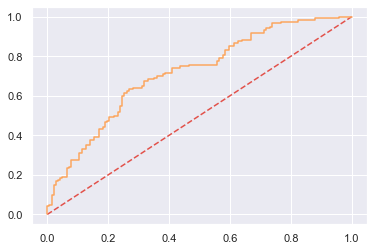

In [50]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Confusion Matrix for the training and testing data

In [51]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

In [52]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

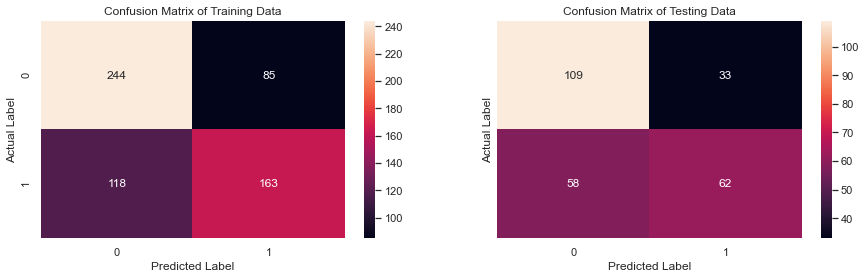

In [53]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# Training Data and Test Data Classification Report

In [54]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [55]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



# Applying GridSearchCV for Logistic Regression

In [56]:
grid={'penalty':['l2','none','l1'],
      'solver':['lbfgs','liblinear'],
      'tol':[0.0001,0.00001]}

In [57]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [58]:
grid_search = GridSearchCV(estimator =lr_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [60]:
best_model = grid_search.best_estimator_

# Predicting on Training and Test dataset

In [61]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [62]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.658744,0.341256
1,0.612416,0.387584
2,0.670306,0.329694
3,0.562033,0.437967
4,0.543884,0.456116


# Model Evaluation

In [63]:
# Accuracy - Training Data

gridsearch_acc_train=best_model.score(X_train, y_train)
gridsearch_acc_train

0.6639344262295082

In [64]:
# Accuracy - Testing Data

gridsearch_acc_test=best_model.score(X_test, y_test)
gridsearch_acc_test

0.6679389312977099

# AUC and ROC for the training data & test data


AUC: 0.735


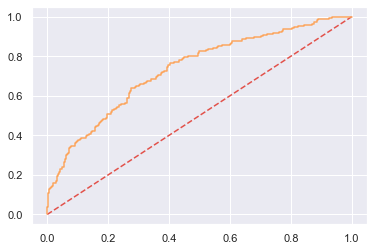

In [65]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gridsearch_auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.735


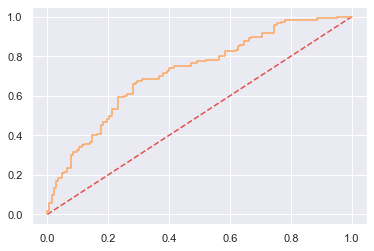

In [66]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gridsearch_auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

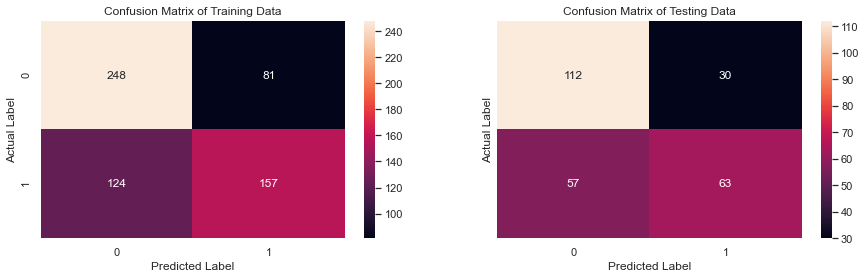

In [67]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# Training Data and Test Data Classification Report

In [68]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.56      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [69]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       142
           1       0.68      0.53      0.59       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262



In [70]:
## Import the model

import statsmodels.formula.api as sm

In [71]:
data.columns

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children',
       'Holiday_Package', 'Foreign'],
      dtype='object')

In [72]:
A1 = 'Holiday_Package ~Salary+Age+Educ+No_young_children+No_older_children+Foreign'

In [73]:
model_1 = sm.logit(formula =A1, data =data).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                  0.1281
Time:                        22:22:27   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
Age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
Educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
No_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
No_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
Foreign               1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

We can see that the P-Value of 'No_older_children' and 'Educ' is greater than 0.05. Hence it confirms that variables 'No_older_children' and 'Educ' attributes have no impact on dependent variable 'Holiday_Package'.

In [74]:
A1 = 'Holiday_Package ~Salary+Age+No_young_children+Foreign'
model_1 = sm.logit(formula =A1, data =data).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                  0.1265
Time:                        22:22:29   Log-Likelihood:                -525.51
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 6.885e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6725      0.426      6.278      0.000       1.838       3.507
Salary            -1.664e-05   4.08e-06     -4.075      0.000   -2.46e-05   -8.64e-06
Age                  -0.0495      0.008     -5.843      0.000      -0.066      -0.033
No_young_children    -1.2946      0.169     -7.669      0.000      -1.625      -0.964
Foreign               1.2124      0.183      6.634      0.000       0.854       1.571
=====================================================================================
"""

* Now all P-Values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable Holiday_Package.

* Also we can see that coefficient value is high for Foreign.

* Salary coefficient value is very low i.e -0.000017. So its impact is almost 0 on dependent variable

In [75]:
model_1.params

Intercept            2.672546
Salary              -0.000017
Age                 -0.049470
No_young_children   -1.294575
Foreign              1.212439
dtype: float64

# Logistic Regression Metrics:

In [76]:
lr_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
LR_metrics=pd.DataFrame(lr_metrics_train).transpose()
lr_train_f1=round(LR_metrics.loc["1"][2],2)
lr_train_recall=round(LR_metrics.loc["1"][1],2)
lr_train_precision=round(LR_metrics.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.56
lr_train_f1  0.61


In [77]:
lr_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
LR_metrics2=pd.DataFrame(lr_metrics_test).transpose()
lr_test_f1=round(LR_metrics2.loc["1"][2],2)
lr_test_recall=round(LR_metrics2.loc["1"][1],2)
lr_test_precision=round(LR_metrics2.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.68
lr_test_recall  0.52
lr_test_f1  0.59


In [78]:
for i,j in np.array(model_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.67) * Intercept + (-0.0) * Salary + (-0.05) * Age + (-1.29) * No_young_children + (1.21) * Foreign + 

# Logistics Regression Conclusion

# Train Data:

AUC: 73%

Accuracy: 66%

Precision: 66%

f1-Score: 61%

Recall: 57%

# Test Data:

AUC: 73%

Accuracy: 66%

Precision: 67%

f1-Score: 59%

Recall: 53%

# Linear Discriminant Analysis:

In [79]:
data_lda.head()

,Salary,Age,Educ,No_young_children,No_older_children,Holiday_Package,Foreign
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [80]:
data_lda.dtypes

Salary               int64
Age                  int64
Educ                 int64
No_young_children    int64
No_older_children    int64
Holiday_Package      uint8
Foreign              uint8
dtype: object

In [81]:
X = data_lda.drop('Holiday_Package',axis=1)
Y = data_lda.pop('Holiday_Package')

In [82]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [83]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


# LDA Model

In [84]:
#Build LDA Model

clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

# Prediction

In [85]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

# Training Data and Test Data Confusion Matrix Comparison

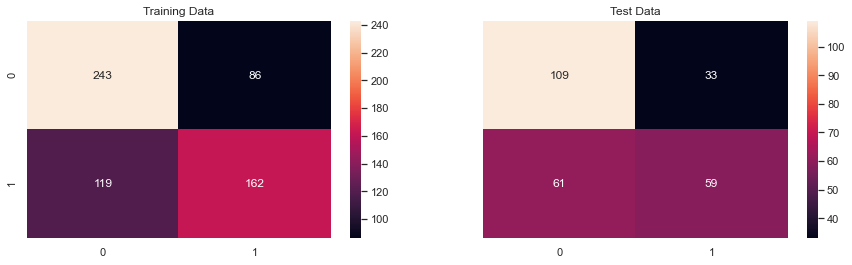

In [86]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Training Data and Test Data Classification Report Comparison

In [87]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



# Probability prediction for the training and test data

In [88]:
# Training Data Probability Prediction

pred_prob_train = model.predict_proba(X_train)
pd.DataFrame(pred_prob_train).head()

,0,1
0,0.261849,0.738151
1,0.710383,0.289617
2,0.617657,0.382343
3,0.235165,0.764835
4,0.533171,0.466829


In [89]:
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
pd.DataFrame(pred_prob_test).head()

,0,1
0,0.708475,0.291525
1,0.533448,0.466552
2,0.717871,0.282129
3,0.504865,0.495135
4,0.555863,0.444137


# Model Evaluation

In [90]:
# Accuracy - Training Data

lda_acc_train= model.score(X_train, Y_train)
lda_acc_train

0.6639344262295082

In [91]:
# Accuracy - Testing Data

lda_acc_test= model.score(X_test, Y_test)
lda_acc_test

0.6412213740458015

# AUC and ROC for the training data & test data

AUC for the Training Data: 0.735


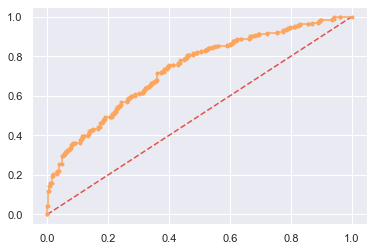

In [92]:
# AUC and ROC for the training data

# calculate AUC
lda_auc_train = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


AUC for the Test Data: 0.735


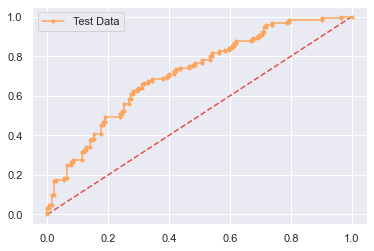

In [93]:
# AUC and ROC for the test data

# calculate AUC
lda_auc_test = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Changing Cut off values for improving Accuracy and F1 scores:

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


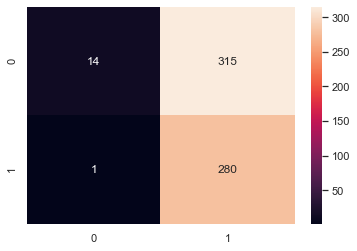

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


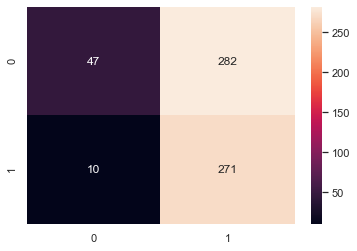

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


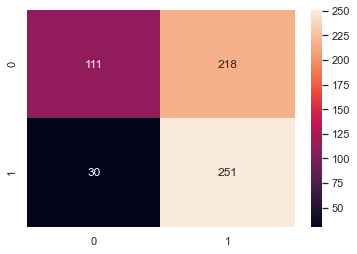

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


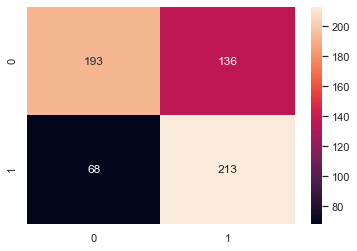

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


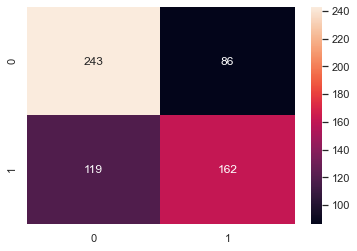

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


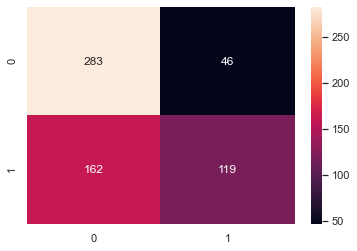

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


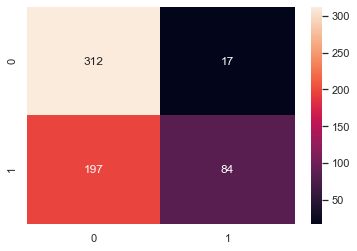

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


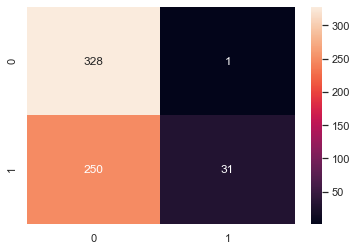

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


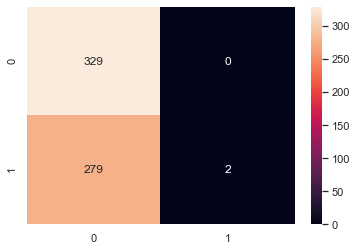

In [94]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [95]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

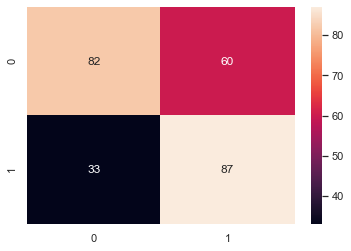

In [96]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g');

In [97]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



# LDA Metrics

In [98]:
lda_metrics_train=classification_report(Y_train, pred_class_train,output_dict=True)
lda_metrics1=pd.DataFrame(lda_metrics_train).transpose()
lda_train_f1=round(lda_metrics1.loc["1"][2],2)
lda_train_recall=round(lda_metrics1.loc["1"][1],2)
lda_train_precision=round(lda_metrics1.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.61


In [99]:
lda_metrics_test=classification_report(Y_test, data_pred_custom_cutoff,output_dict=True)
lda_metrics2=pd.DataFrame(lda_metrics_test).transpose()
lda_test_f1=round(lda_metrics2.loc["1"][2],2)
lda_test_recall=round(lda_metrics2.loc["1"][1],2)
lda_test_precision=round(lda_metrics2.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.59
lda_test_recall  0.72
lda_test_f1  0.65


# Model Comparison

In [100]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data_lr_lda = pd.DataFrame({'LR Train':[gridsearch_acc_train,gridsearch_auc_train,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[gridsearch_acc_test,gridsearch_auc_test,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_acc_train,lda_auc_train,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_acc_test,lda_auc_test,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data_lr_lda,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.66,0.67,0.66,0.64
AUC,0.73,0.72,0.73,0.71
Recall,0.56,0.52,0.58,0.72
Precision,0.66,0.68,0.65,0.59
F1 Score,0.61,0.59,0.61,0.65


* Logistic Regression and LDA have relatively similar scores with minimal difference when it comes to training and testing data.

* We can see that both models are giving similar results with not much of difference in accuracy.

* It appears that LDA gives better f1 score and better recall rate as compared to the Logistic Regression.

* Among both the models, we go with LDA as LDA test data has better accuracy, recall and F1 scores.

# Insights and recommendations for Business:

A travel and tour agency which deals in selling holiday packages has approached us with a business problem. The business problem is to predict whether an employee of a company would opt for holiday package or not. We analysed the data of 872 employees and built models using Logistic regression and Linear discriminant analysis to predict if the employee will opt for holiday package or not. Below are the inferences from the analysis:

* If the employee is foreigner and if the employee is not having young children, chances of opting for Holiday Package is good.
* Business can provide reward points like cashbacks, referral discount for referring their holiday packages to others and hassle free experience to these employees to encourage more sales.
* Introducing special offers and good deals on holiday packages to domestic employees can encourage them to opt for the tour. 
* It is observed that, the employees with high salaries are not opting for Holiday Package. Company can focus on high salaried employees to sell Holiday Package. 
* It appears that employees above 50 years are less likely to opt for holiday packages. Business can introduce few special packages designed for people above 50 to increase their sales.
* Number of older children and Education does not seem to have any effect on whether or not employee will opt for holiday package.
* It can be observed from coefficient arrived from both models that opting for Holiday package has strong negative relation with number of young children. Holiday packages can be modified to make infant and young children friendly to attract more employees having young children.